# The Problem With Overfitting
- If we have the following data and we use linear regression in one variable for this we might get a line which looks like this.
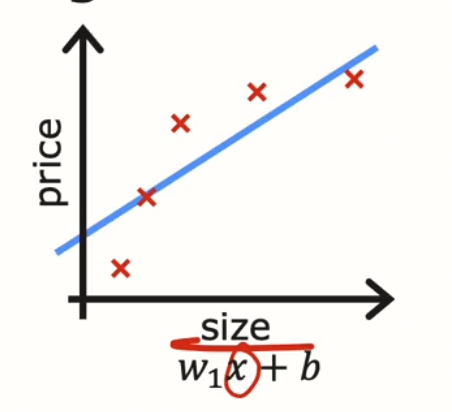
- but looking at the training data we realise that the training data doesn't fit the training data well.
- we observe that the house prices kinda flatten out as the size increases.
- the techical term for this is the model is **underfitting** the training data or has a **high bias**.
- but if we fit a quadratic function to the training data we observe that the curve fits pretty well
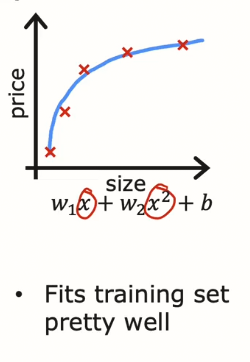
- if we were to fit a fourth order polynomial to the data we would get graph that fits like
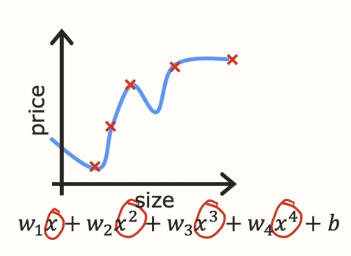
- this would give a cost function of 0 because the errors are zero on all 5 training example.
- we would say that this data would **overfit** the training data or have **high variance**
- the goal of machine learning is to find the parameters such that it fits the training data without underfitting or overfitting.
- for a training set with 2 variables.
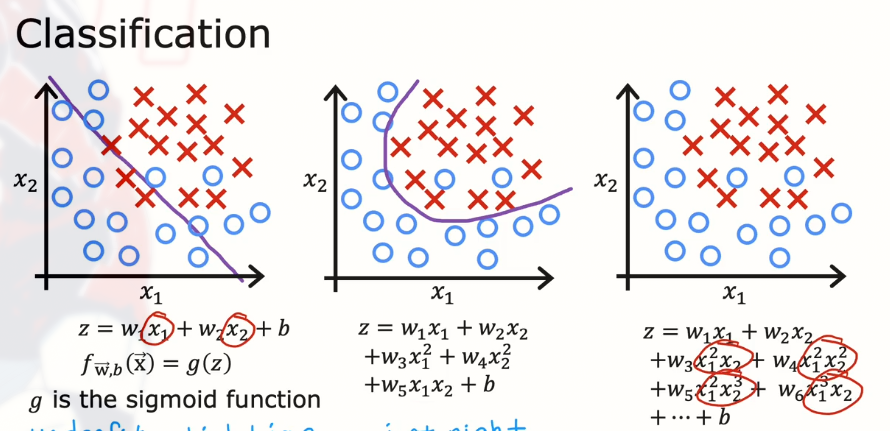

# Addressing overfitting
1. One way is to collect more training data. Such that even the overfit data is perfectly fitted.
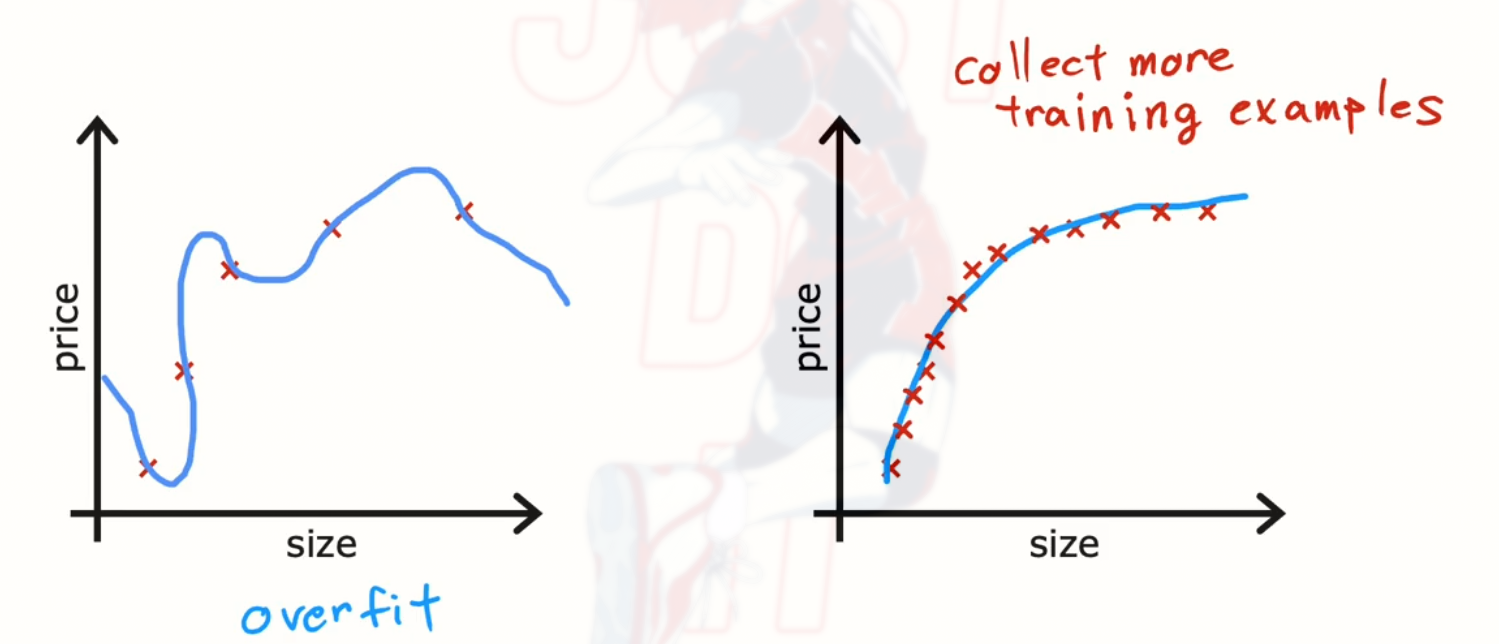
2. Select features to include or exclude
  if we were to have size, bedrooms, age, floors, avg income and distance to the nearest coffee shop as the parameters and we dont have enough training data. and run the algorithm for more epochs then the algorithm might try to overfit the training data.
  but by including only age size and no of bedrooms in the cost function we might get the parameters to fit the training data just right.
3. Regularization
  if all the parameters are important and have to be included in the cost function we can use regularization to reduce the impact of some of the parameters.
  by convention we normally reduce the size of only wj parameters it doesnt make a difference wheter you reduce b or not

### Regularization in Logistic Regression

#### Regularizing Specific Parameters

In logistic regression, we can regularize specific parameters to prevent them from becoming too large. For example, if we want to minimize $w_3$ and $w_4$, we add a regularization term to the cost function:

\[ J(w, b) = \frac{1}{m} \sum_{i=1}^{m} L(w, b; \mathbf{x}^{(i)}, y^{(i)}) + 1000 \cdot w_3^2 + 1000 \cdot w_4^2 \]

Here, $L(w, b; \mathbf{x}^{(i)}, y^{(i)})$ is the logistic loss function. By adding $1000 \cdot w_3^2 + 1000 \cdot w_4^2$ to the cost function, we penalize the model for having large values for $w_3$ and $w_4$. This encourages the model to keep these parameters small, which helps to prevent overfitting.

#### Why Penalize Specific Parameters?

Having large values for $w_3$ and $w_4$ can make the model overly sensitive to these particular features, potentially leading to overfitting. By penalizing these weights, we reduce their influence, encouraging the model to distribute importance more evenly across all features.

#### Regularizing All Parameters

When we do not know which features are important, we regularize all parameters $w_j$ to prevent overfitting. For example, in predicting house prices, features such as:

- Size of the house
- Number of bedrooms
- Number of floors
- Age of the house
- Average neighborhood income
- Distance to the nearest coffee shop

might all contribute to the prediction. We regularize by adding a term to the cost function:

$$ J(w, b) = \frac{1}{m} \sum_{i=1}^{m} L(w, b; \mathbf{x}^{(i)}, y^{(i)}) + \frac{\lambda}{2m} \sum_{j=1}^{n} w_j^2 $$

Here, $\lambda$ is the regularization parameter that controls the trade-off between fitting the training data well and keeping the model parameters small.

- **If $\lambda = 0$**: The regularization term vanishes, and the model might overfit, capturing noise in the training data.
- **If $\lambda$ is very large**: All $w_j$ values become very small or zero, and only the intercept $b$ remains significant. This can lead to underfitting, where the model is too simple to capture the underlying patterns in the data.

#### Why Regularize All Parameters?

Regularizing all parameters ensures that the model does not rely too heavily on any single feature. This is particularly useful when dealing with datasets where the importance of each feature is not known beforehand. By adding the regularization term, we penalize large weights, encouraging the model to distribute importance more evenly across all features. This helps create a more generalized model that performs better on unseen data.

#### Choosing the Regularization Parameter $\lambda$

Selecting the right value of $\lambda$ is crucial:

- **If $\lambda$ is too small**: The model might overfit, capturing noise in the training data.
- **If $\lambda$ is too large**: The model might underfit, becoming too simple and failing to capture the underlying patterns in the data.

A good practice is to use cross-validation to choose an optimal value of $\lambda$.

#### Summary

Regularization helps in controlling the complexity of the model by penalizing large weights. This prevents overfitting and ensures that the model generalizes well to unseen data. By adding a regularization term to the cost function, we can control the influence of each feature, leading to a more robust and reliable model.

$$ J(w, b) = \frac{1}{m} \sum_{i=1}^{m} L(w, b; \mathbf{x}^{(i)}, y^{(i)}) + \frac{\lambda}{2m} \sum_{j=1}^{n} w_j^2 $$

In conclusion, regularization is a powerful technique to improve the performance of logistic regression models, particularly when dealing with complex datasets where the importance of features is not clear.


### Regularization in Linear Regression

Regularization is a technique used to prevent overfitting by adding a penalty term to the cost function. In linear regression, regularization helps keep the model parameters small, ensuring that the model generalizes well to new data.

#### Cost Function with Regularization

The regularized cost function for linear regression is given by:

$$ J(w, b) = \frac{1}{2m} \sum_{i=1}^{m} \left( f_{w,b}(\mathbf{x}^{(i)}) - y^{(i)} \right)^2 + \frac{\lambda}{2m} \sum_{j=1}^{n} w_j^2  $$

where:
- $ m $ is the number of training examples.
- $ n $ is the number of features.
- $ f_{w,b}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b $ is the hypothesis function.
- $ \lambda $ is the regularization parameter that controls the trade-off between fitting the training data and keeping the weights small.

#### Gradient Descent with Regularization

To minimize the regularized cost function, we use gradient descent. The update rules for the parameters $ w_j $ and  $ b $ are derived from the partial derivatives of the cost function.

##### Gradient Descent Update for $ w_j $

The gradient descent update rule for $ w_j $ (where we are regularizing $ w_j $ values) is:

$$ w_j := w_j - \alpha \left( \frac{1}{m} \sum_{i=1}^{m} \left( f_{w,b}(\mathbf{x}^{(i)}) - y^{(i)} \right) x_j^{(i)} + \frac{\lambda}{m} w_j \right) $$

Here:
- $ \alpha $is the learning rate.
- The term $ \frac{\lambda}{m} w_j $ is the regularization term, which penalizes large weights.

##### Gradient Descent Update for $ b $

Since we are not regularizing $ b $,the update rule for \( b \) remains the same as in standard linear regression:

$ b := b - \alpha \left( \frac{1}{m} \sum_{i=1}^{m} \left( f_{w,b}(\mathbf{x}^{(i)}) - y^{(i)} \right) \right) $

#### Summary

Regularization helps prevent overfitting by adding a penalty term to the cost function, which discourages large weights. By adjusting the regularization parameter $ \lambda $, we can control the trade-off between fitting the training data well and keeping the weights small. The update rules for gradient descent are modified to include the regularization term for $ w_j $, while the update rule for $ b $ remains unchanged.

$$ J(w, b) = \frac{1}{2m} \sum_{i=1}^{m} \left( f_{w,b}(\mathbf{x}^{(i)}) - y^{(i)} \right)^2 + \frac{\lambda}{2m} \sum_{j=1}^{n} w_j^2 $$

$$ w_j := w_j - \alpha \left( \frac{1}{m} \sum_{i=1}^{m} \left( f_{w,b}(\mathbf{x}^{(i)}) - y^{(i)} \right) x_j^{(i)} + \frac{\lambda}{m} w_j \right) $$

$$ b := b - \alpha \left( \frac{1}{m} \sum_{i=1}^{m} \left( f_{w,b}(\mathbf{x}^{(i)}) - y^{(i)} \right) \right) $$


### Regularization in Logistic Regression

Regularization in logistic regression helps prevent overfitting by adding a penalty term to the cost function, which discourages large weights. This helps ensure that the model generalizes well to new data.

#### Cost Function with Regularization

The regularized cost function for logistic regression is given by:

$$ J(w, b) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(f_{w,b}(\mathbf{x}^{(i)})) + (1 - y^{(i)}) \log(1 - f_{w,b}(\mathbf{x}^{(i)})) \right] + \frac{\lambda}{2m} \sum_{j=1}^{n} w_j^2 $$

where:
- $ m $ is the number of training examples.
- $ n $ is the number of features.
- $ f_{w,b}(\mathbf{x}) = \frac{1}{1 + e^{-(\mathbf{w} \cdot \mathbf{x} + b)}} $ is the hypothesis function (sigmoid function).
- $ \lambda $ is the regularization parameter that controls the trade-off between fitting the training data and keeping the weights small.

#### Gradient Descent with Regularization

To minimize the regularized cost function, we use gradient descent. The update rules for the parameters $ w_j $ and $ b $ are derived from the partial derivatives of the cost function.

##### Gradient Descent Update for $ w_j $

The gradient descent update rule for $ w_j $ (where we are regularizing $ w_j $ values) is:

$$ w_j := w_j - \alpha \left( \frac{1}{m} \sum_{i=1}^{m} \left( f_{w,b}(\mathbf{x}^{(i)}) - y^{(i)} \right) x_j^{(i)} + \frac{\lambda}{m} w_j \right)$$

Here:
- $ \alpha $ is the learning rate.
- The term $ \frac{\lambda}{m} w_j $ is the regularization term, which penalizes large weights.

##### Gradient Descent Update for $ b$

Since we are not regularizing $ b $, the update rule for $ b $ remains the same as in standard logistic regression:

$$ b := b - \alpha \left( \frac{1}{m} \sum_{i=1}^{m} \left( f_{w,b}(\mathbf{x}^{(i)}) - y^{(i)} \right) \right)$$

#### Summary

Regularization in logistic regression helps prevent overfitting by adding a penalty term to the cost function, which discourages large weights. By adjusting the regularization parameter $ \lambda $, we can control the trade-off between fitting the training data well and keeping the weights small. The update rules for gradient descent are modified to include the regularization term for $ w_j $, while the update rule for $ b $ remains unchanged.


